<a href="https://colab.research.google.com/github/vsbca/Data-Science/blob/master/Timeseries_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
#ref:
#https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/vsbca/Data-Science/master/Data/multiTimeline.csv")
df.head()

,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 168 non-null    object
 1   diet: (Worldwide)     168 non-null    int64 
 2   gym: (Worldwide)      168 non-null    int64 
 3   finance: (Worldwide)  168 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.4+ KB


#Rename the dataframe column names

In [5]:
df.columns = ["month", "diet", "gym", "finance"]
df.head()

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


use .to_datetime() to convert the 'month' column in your DataFrame to a DateTime.

In [6]:
df.month = pd.to_datetime(df.month)
df.set_index('month', inplace=True)



In [7]:
df.head()

,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


Text(0.5, 0, 'Year')

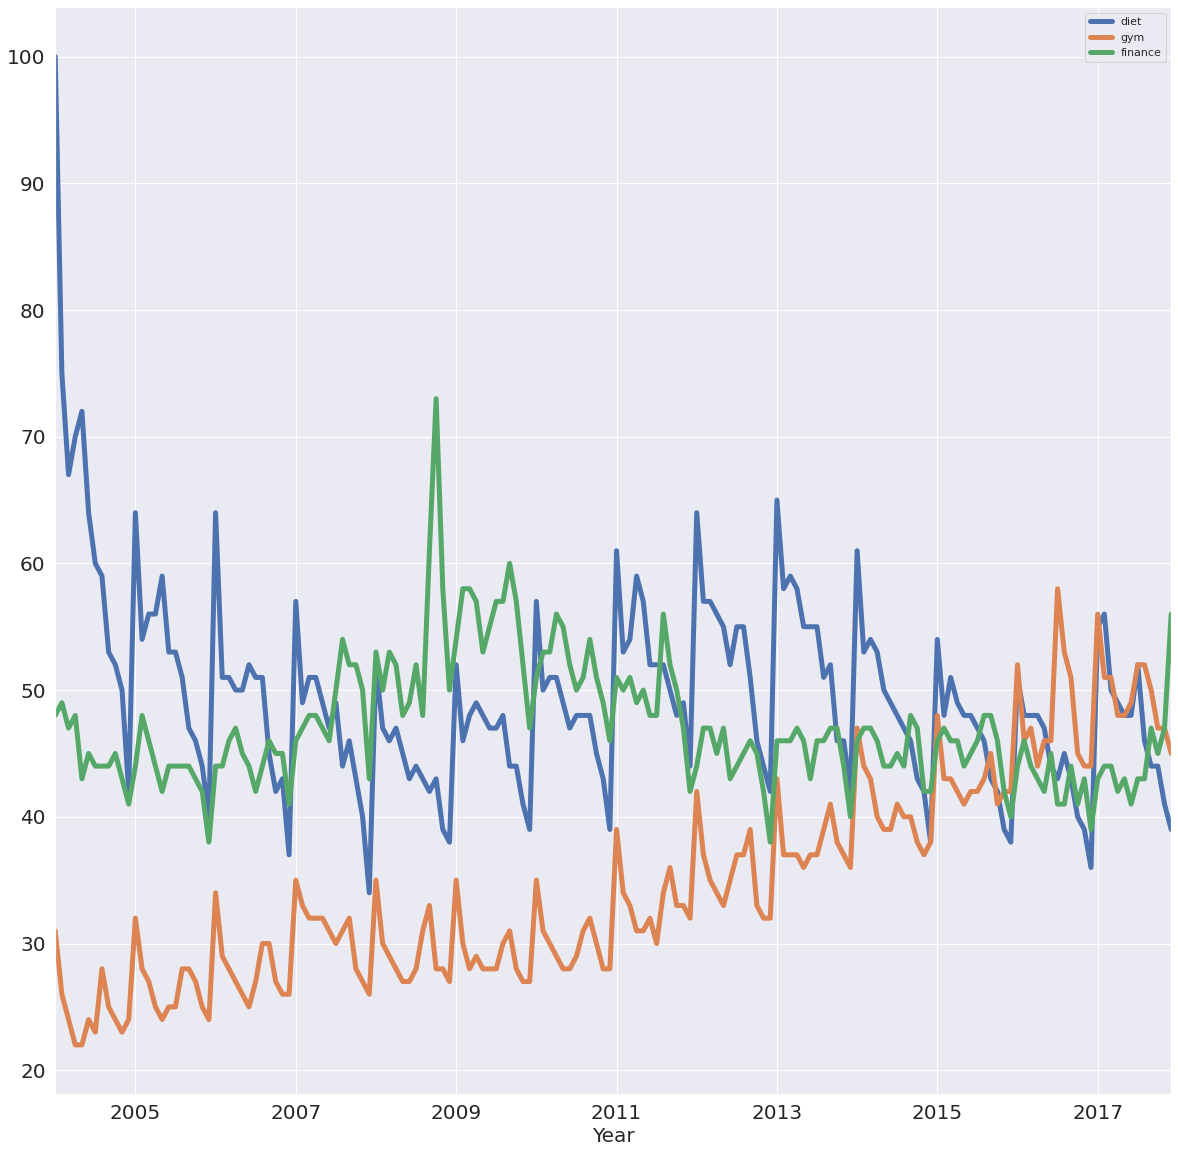

In [8]:
df.plot(figsize=(20,20), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)